In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

In [2]:
df = pd.read_csv('startUp(2).csv')
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data= df.copy()
data.to_csv('startUp.csv')

In [4]:
data.isnull().sum()

Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
data.drop('State', axis = 1, inplace = True)

In [7]:
# data Preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in data.drop('Profit', axis = 1).columns:
    data[i] = scaler.fit_transform(data[[i]])

data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94


In [8]:
def plotter(data, col1, col2, col3, col4):
    plt.figure(figsize = (12, 3))
    plt.subplot(1, 4, 1)
    sns.boxplot(x = data[col1])

    plt.subplot(1, 4, 2)
    sns.boxplot(x= data[col2])

    plt.subplot(1, 4, 3)
    sns.boxplot(x = data[col3])

    plt.subplot(1, 4, 4)
    sns.boxplot(x = data[col4])

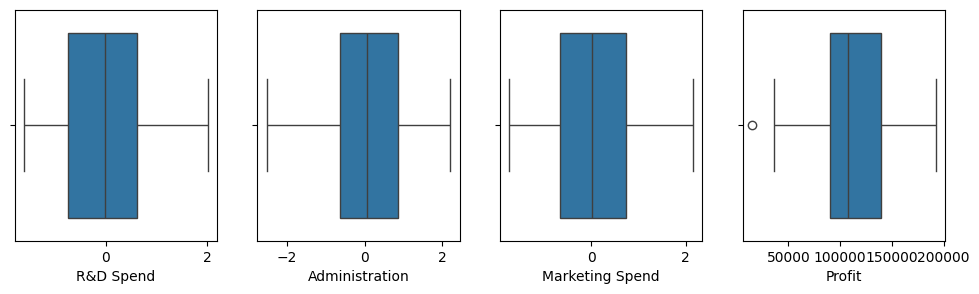

In [9]:
plotter(data, 'R&D Spend',	'Administration', 	'Marketing Spend', 'Profit')

In [10]:
# Outlier Removal
def outlierRemoval(dataframe, target):
    for i in dataframe.drop(target, axis = 1).columns:
        if dataframe[i].dtypes != 'O': # ------------------------------- If the data type is not an object type
            Q1 = dataframe[i].describe()[4] # -------------------------- Identify lower Quartile
            Q3 = dataframe[i].describe()[6] # -------------------------- Identify the upper quartile
            IQR = Q3 - Q1 # -------------------------------------------- Get Inter Quartile Range
            minThreshold = Q1 - 1.5 * IQR # ---------------------------- Get Minimum Threshold
            maxThreshold = Q3 + 1.5 * IQR # ---------------------------- Get Maximum Threshold

            dataframe = dataframe.loc[(dataframe[i] >= minThreshold) & (dataframe[i] <= maxThreshold)]
    return dataframe

<Axes: >

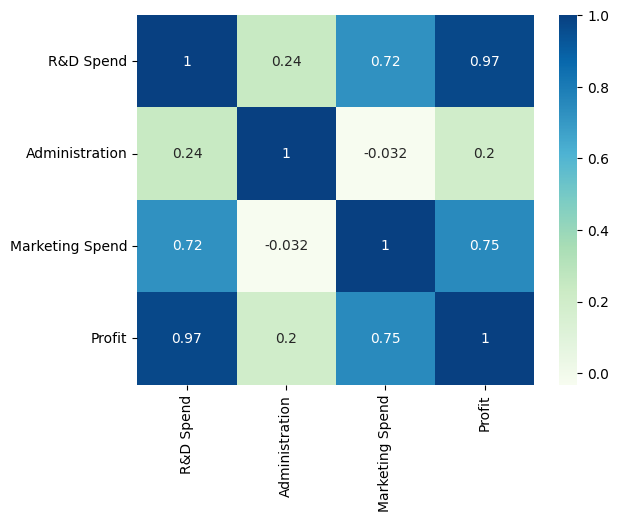

In [11]:
# ASCERTAINING MULTI-COLINEARITY
sns.heatmap(data.corr(), annot = True, cmap = 'GnBu')

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop('Profit', axis = 1)
y = data.Profit

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 7)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))

xtrain: (40, 3)
xtest: (10, 3)
ytrain: (40,)
ytest: (10,)


In [13]:
# MODELLING ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)
lin_reg

LinearRegression()

In [14]:
import joblib
joblib.dump(lin_reg, open('startUpModel.pkl', 'wb'))

In [15]:
train = pd.concat([xtrain, ytrain], axis = 1)
test = pd.concat([xtest, ytest], axis = 1)

print(f'Train Set')
display(train.head())

print(f'\n\nTest Set')
display(test.head())

Train Set


,R&D Spend,Administration,Marketing Spend,Profit
32,-0.226949,0.283924,-1.362450,97427.84
46,-1.593413,-0.199322,0.711122,49490.75
34,-0.600682,1.310535,-0.001879,96712.80
18,0.396725,-0.258465,0.692992,124266.90
17,0.460720,0.855666,0.591017,125370.37




Test Set


,R&D Spend,Administration,Marketing Spend,Profit
13,0.402078,0.510179,0.343957,134307.35
15,0.897913,0.045868,0.419219,129917.04
22,0.006007,0.051850,0.762376,110352.25
42,-1.102106,-0.906938,-0.520596,71498.49
30,-0.258074,-0.205629,-0.990357,99937.59
